# 03 - Numpy

This notebook will cover NumPy (numeric python) and some graphing

- NumPy is a package in Python used to work with arrays and matrices of data
- It underlies Pandas
- Written in C, so it is very fast
- Guy who wrote Pandas has a free book [here](https://wesmckinney.com/book/)

Import as np

In [ ]:
import numpy as np
from numpy import argmaxe

Create from a list of numbers. Better to create a list first, add to that and then wrap with np.array

In [323]:
list_ = [1, 2, 3, 4, 5, 6, 7, 8]
arr = np.array(list_)
print(arr)

[1 2 3 4 5 6 7 8]


Creating one from a nested list will create a 2-dimensional array

In [324]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

All arrays have a `shape`, which is a tuple of the dimensions (for 2-d would be the number of rows and columns).  
Know difference between properties and methods

In [325]:
arr.shape

(2, 3)

Also have a `ndim` attribute specifying the number of dimensions

In [326]:
arr.ndim

2

And a `size` attribute indicating the number of elements

In [327]:
arr.size

6

The data elements in an array have a type

In [328]:
arr.dtype

dtype('int32')

Which is different than using Python's built-in type

In [329]:
type(arr)

numpy.ndarray

Default type is float64, which has pretty high precision

In [330]:
np.random.random((3,3)).dtype

dtype('float64')

Array data must be all of same type (homogeneous).  If strings are mixed in, then it will cast numeric data to strings as well and use the U data type

In [331]:
arr = np.array([1, 2, 3, 'test'])
arr

array(['1', '2', '3', 'test'], dtype='<U11')

When you add strings longer than 11 characters, it will truncate them

In [332]:
arr[0] = 'testesteggdrtwsesgfd'
arr

array(['testesteggd', '2', '3', 'test'], dtype='<U11')

Can specify the type of data

In [333]:
arr = np.array([1, 2, 3, 4], dtype='float64')
arr

array([1., 2., 3., 4.])

Be careful using the string_ type as well as you have to specify the length and any operation with NumPy may truncate your strings.

In [334]:
np.array(["1.25235346457365685754", "-9.6", "42"], dtype='S5')

array([b'1.252', b'-9.6', b'42'], dtype='|S5')

In [335]:
arr.astype('int32')

array([1, 2, 3, 4])

Can create arrays of 0s

In [336]:
arr = np.zeros((3,3))
arr

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Or 1s

In [337]:
arr = np.zeros((3,3))
arr

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Or the identity matrix (`np.eye()` does the same thing)

In [338]:
id = np.identity(3)
id

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

The identity times a matrix returns that original matrix

In [339]:
id @ np.array([[1,2,3],[4,5,6],[7,8,9]])

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

Use `np.ones_like` and `np.zeros_like` to create an array of 1s or 0s the same shape as the input matrix

In [340]:
arr = np.ones_like(id)
arr

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [341]:
arr.shape

(3, 3)

Can use `np.full` to create an array.  Must have a fill value

In [342]:
arr = np.full((3, 2), fill_value=7)
arr

array([[7, 7],
       [7, 7],
       [7, 7]])

Use `np.linspace` to create an array of values evenly spaced between 2 values.  Could be useful for something like gridsearch.  Uses a closed range.

In [343]:
np.linspace(1,9,20)

array([1.        , 1.42105263, 1.84210526, 2.26315789, 2.68421053,
       3.10526316, 3.52631579, 3.94736842, 4.36842105, 4.78947368,
       5.21052632, 5.63157895, 6.05263158, 6.47368421, 6.89473684,
       7.31578947, 7.73684211, 8.15789474, 8.57894737, 9.        ])

Also have `np.logspace`

In [344]:
np.logspace(1,9,20)

array([1.00000000e+01, 2.63665090e+01, 6.95192796e+01, 1.83298071e+02,
       4.83293024e+02, 1.27427499e+03, 3.35981829e+03, 8.85866790e+03,
       2.33572147e+04, 6.15848211e+04, 1.62377674e+05, 4.28133240e+05,
       1.12883789e+06, 2.97635144e+06, 7.84759970e+06, 2.06913808e+07,
       5.45559478e+07, 1.43844989e+08, 3.79269019e+08, 1.00000000e+09])

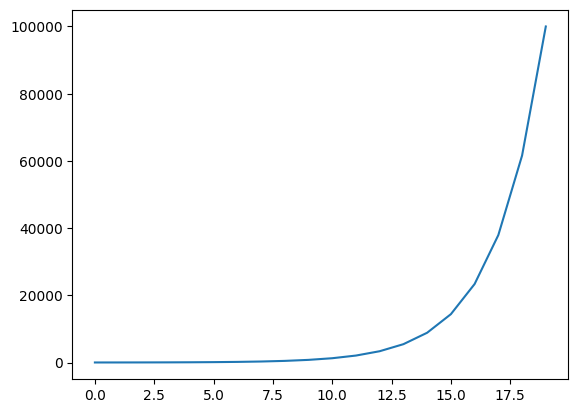

In [345]:
import matplotlib.pyplot as plt

plt.plot(np.arange(20), np.logspace(1,5,20))
plt.show()

In [346]:
np.log10(np.logspace(1,5,20))

array([1.        , 1.21052632, 1.42105263, 1.63157895, 1.84210526,
       2.05263158, 2.26315789, 2.47368421, 2.68421053, 2.89473684,
       3.10526316, 3.31578947, 3.52631579, 3.73684211, 3.94736842,
       4.15789474, 4.36842105, 4.57894737, 4.78947368, 5.        ])

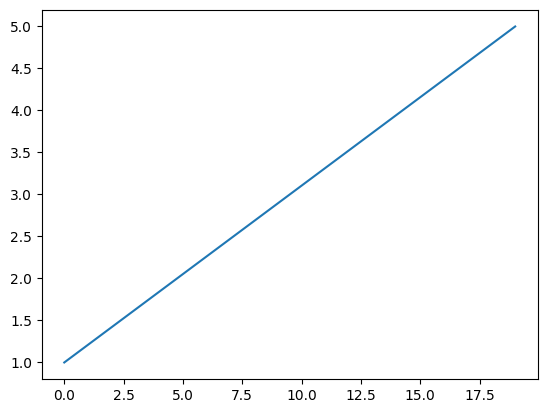

In [347]:
plt.plot(np.arange(20), np.log10(np.logspace(1,5,20)))
plt.show()

Use reshape to change the shape of an array

In [348]:
arr.reshape((2,3))

array([[7, 7, 7],
       [7, 7, 7]])

Use `np.arange` to create a range of numbers which can be iterated over

In [349]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Use start and stop to specify the range of values to use.  Use step to specify the increment.  stop is non-inclusive

In [350]:
arr = np.arange(start=5, stop=9, step=2)
arr

array([5, 7])

Use `np.ravel()` to unravel the data into a 1-dimensional array (why is it called ravel??)

In [351]:
arr = np.arange(9).reshape((3,3))
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [352]:
arr.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

And use T to get the transpose of arrays (flip the rows and columns)

In [353]:
arr.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

{this is s}

Lots of random number generation in NumPy

In [354]:
# Set a random seed first.  This is important in Python and all of machine learning to ensure reproducibility
np.random.seed(42)

Use np.random.rand to generate an array of random numbers

In [355]:
np.random.rand(3,2)

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452]])

Can also generate integers

In [356]:
np.random.randint(1,10, size=(3,2))

array([[8, 5],
       [4, 8],
       [8, 3]])

Can also generate numbers from the standard normal distribution

In [357]:
arr = np.random.standard_normal(10000)
arr

array([-0.46947439,  0.54256004, -0.46341769, ..., -0.77104216,
        1.0008205 , -0.78167207])

In [358]:
np.mean(arr)

-0.002659303155149634

In [359]:
np.std(arr)

1.0033295130022368

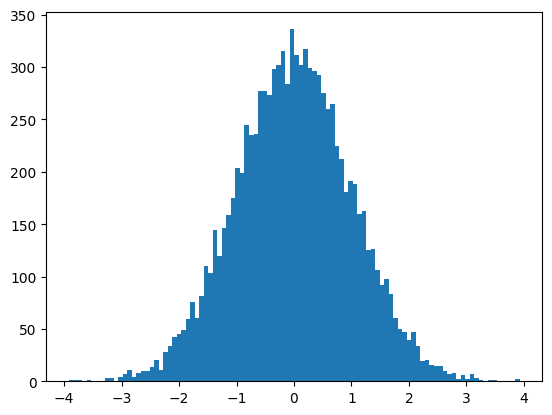

In [360]:
plt.hist(arr, bins=100)
plt.show()

Random also has `np.shuffle` which shuffles in place

In [361]:
arr = np.array([i*3 for i in np.arange(25)])
arr

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
       51, 54, 57, 60, 63, 66, 69, 72])

In [362]:
np.random.shuffle(arr)
arr

array([24, 21, 12, 66, 54,  3, 48, 27, 63, 33, 30, 69,  9,  0, 51, 15, 36,
       57, 18, 42, 45,  6, 39, 72, 60])

NumPy is very fast and takes advantage of vectorization (functions operate on an entire array all at once).  Use NumPy functions instead of for loops, when possible.

In [363]:
%timeit np.arange(10000) * 2

6.01 µs ± 352 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [364]:
%timeit np.array([x*2 for x in list(range(10000))])

524 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


NumPy allows [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html).  Broadcasting is when you multiply a smaller array times a larger array and it applies that operation to every value in the array.  Easiest example is multiplying an array by a scalar

In [365]:
np.arange(20) * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38])

When available, use built-in NumPy functions.  They are very fast.

In [366]:
arr = np.arange(9).reshape((3,3))
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

There are unary functions (which operate on 1 value at a time)

In [367]:
np.sum(arr)

36

In [368]:
np.sum(arr, axis=0)

array([ 9, 12, 15])

In [369]:
np.sum(arr, axis=1)

array([ 3, 12, 21])

And binary functions

In [370]:
np.add(arr, arr)

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

Can filter arrays using masks

In [371]:
arr = np.arange(19)
arr > 3

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [372]:
arr[arr > 3]

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

Negate with ~ or !

In [373]:
arr[~(arr > 3)]

array([0, 1, 2, 3])

Use & and | to combine conditions

In [374]:
arr[(arr > 3) & (arr<11)]

array([ 4,  5,  6,  7,  8,  9, 10])

You can index like lists

In [375]:
arr = np.arange(20).reshape((4,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [376]:
arr[:,1:3]

array([[ 1,  2],
       [ 6,  7],
       [11, 12],
       [16, 17]])

Fancy indexing means you can select indices using a list

In [377]:
arr = np.arange(start=10, stop=50)
arr[[3,5,9]]

array([13, 15, 19])

You can assign values to a slice

In [378]:
arr[3:5] = 1
arr

array([10, 11, 12,  1,  1, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

But this will change the original array, if you have made a copy

In [379]:
arr = np.arange(start=10, stop=50)
arr2 = arr
arr2[3:5] = 10000
arr

array([   10,    11,    12, 10000, 10000,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49])

If you want a copy, use `.copy()`

In [380]:
arr = np.arange(start=10, stop=50)
arr2 = arr.copy()
arr2[3:5] = 10000
arr

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

Negative indexing also works

In [381]:
arr[-1]

49

Matrix multiplication is also important and is valuable for machine learning.  Large language models consist of many many many matrix multiplications

-   For matrix multiplication, the most important thing to remember is that the inner dimensions of the two matrices you are multiplying must be the same and the dimensions of the new matrix will be the outer dimensions of the two original matrices

In [382]:
big_list = [val//100 for val in np.arange(10000)]
    
matrix = np.array(big_list).reshape(100,100)
print("Matrix______")
print(matrix)

little_list = [val for val in np.arange(100)]

vector = np.array(little_list)
print("Vector______")
print(vector)
print("Matrix-matrix______")
print(np.dot(matrix,matrix))
print("Matrix-vector______")
print(np.matmul(vector, matrix))
print("Vector-vector______")
print(np.dot(vector,vector))

Matrix______
[[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [97 97 97 ... 97 97 97]
 [98 98 98 ... 98 98 98]
 [99 99 99 ... 99 99 99]]
Vector______
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Matrix-matrix______
[[     0      0      0 ...      0      0      0]
 [  4950   4950   4950 ...   4950   4950   4950]
 [  9900   9900   9900 ...   9900   9900   9900]
 ...
 [480150 480150 480150 ... 480150 480150 480150]
 [485100 485100 485100 ... 485100 485100 485100]
 [490050 490050 490050 ... 490050 490050 490050]]
Matrix-vector______
[328350 328350 328350 328350 328350 328350 328350 328350 328350 328350
 328350 328350 328350 328350 328350 328350 328350 328350 328350 328350
 328350 328350 328350 328350 3

Can also use @ for matrix multiplication

In [383]:
arr = np.arange(20).reshape((4,5))
arr2 = np.arange(20).reshape((5,4))

arr @ arr2

array([[120, 130, 140, 150],
       [320, 355, 390, 425],
       [520, 580, 640, 700],
       [720, 805, 890, 975]])

np.argmax is useful for grabbing the index of the maximum value.  This is useful if you have an array of probabilities

In [384]:
arr = np.arange(50)
np.random.shuffle(arr)
arr[np.argmax(arr)]

49

In [385]:
arr = np.random.rand(24).reshape((6,4))
probs = arr/np.sum(arr, axis=1).reshape((arr.shape[0], -1))
probs

array([[0.16179396, 0.24306337, 0.46688327, 0.1282594 ],
       [0.16703765, 0.30228779, 0.15051077, 0.3801638 ],
       [0.31611141, 0.25615872, 0.22819598, 0.19953389],
       [0.26843389, 0.10263403, 0.49220542, 0.13672666],
       [0.06574491, 0.54003165, 0.12644804, 0.2677754 ],
       [0.07197794, 0.34880301, 0.44075913, 0.13845992]])

In [386]:
np.sum(arr, axis=1).reshape((arr.shape[0], -1)).shape

(6, 1)

In [387]:
np.sum(arr, axis=1).shape

(6,)

In [388]:
np.argmax(probs, axis=1)

array([2, 3, 0, 2, 1, 2], dtype=int64)

In [389]:
cats = np.array(['dog', 'cat', 'fish', 'duck'])
cats[np.argmax(probs, axis=1)]

array(['fish', 'duck', 'dog', 'fish', 'cat', 'fish'], dtype='<U4')

Can also read data into Python using NumPy

In [390]:
fn = 'flightsnyarea.csv'
ar = np.genfromtxt(fn, delimiter=',')
print(ar)

[[  nan   nan   nan ...   nan   nan   nan]
 [  nan   nan   nan ...   nan  46.8   nan]
 [  nan   nan   nan ...   nan  73.2  90.7]
 ...
 [  nan   nan   nan ...   nan 299.9 310.1]
 [  nan   nan   nan ...   nan 299.7 310.1]
 [  nan   nan   nan ...   nan 299.7 310.1]]


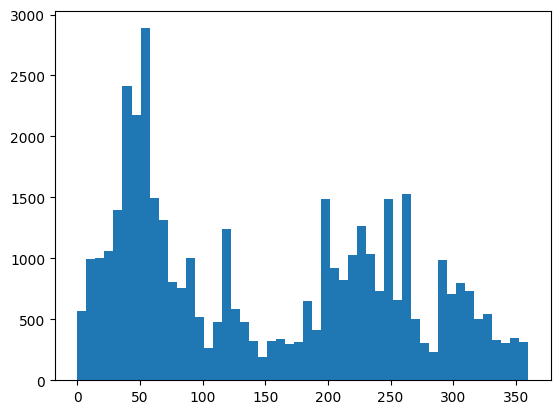

In [391]:
# direction
plt.hist(ar[:,10],bins=50)
plt.show()

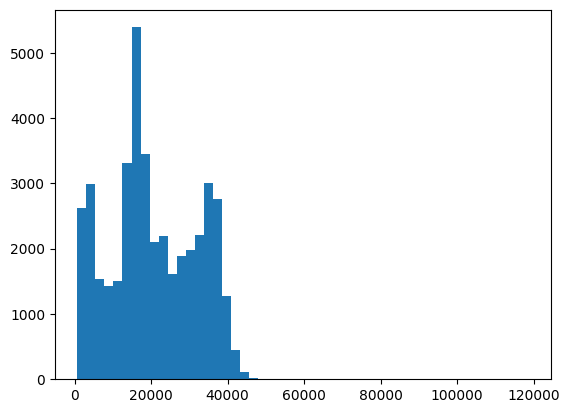

In [392]:
# altitude in feet
# data is received.  not receiving data from aircraft that are far away and low
plt.hist(ar[:,7],bins=50)
plt.show()

# Other Interesting/Useful Functions, if we have the time

- np.argsort
- np.argmax
- np.where(cond, xarr, yarr)
- np.sort()
- np.concatenate
- np.vstack and np.hstack
- np.repeat